<a href="https://colab.research.google.com/github/backblaz/DataScience-Exercise/blob/main/Us_food_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Load the datasets

df = pd.read_csv('/agresearchexpenditures1970-2019.csv')

df.head()

,Year,Attribute,Value
0,1970,"Private agriculture input industries R&D, cons...",2780.123
1,1971,"Private agriculture input industries R&D, cons...",2719.431
2,1972,"Private agriculture input industries R&D, cons...",2491.092
3,1973,"Private agriculture input industries R&D, cons...",2712.828
4,1974,"Private agriculture input industries R&D, cons...",2885.518


In [ ]:
### info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       430 non-null    int64  
 1   Attribute  430 non-null    object 
 2   Value      430 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
df.shape

(430, 3)

In [ ]:
df.describe()


,Year,Value
count,430.000000,430.000000
mean,1993.453488,3631.325377
std,13.915879,2690.549409
min,1970.000000,10.950000
25%,1981.250000,1292.257750
50%,1993.000000,3455.053000
75%,2005.000000,5686.996000
max,2019.000000,13727.939000


In [ ]:
# 1. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# 2. Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 3. Check for unique values in the 'Attribute' column
print("\nUnique values in the 'Attribute' column:")
print(df["Attribute"].unique())

# 4. Check data types
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
Year         0
Attribute    0
Value        0
dtype: int64

Number of duplicate rows: 0

Unique values in the 'Attribute' column:
['Private agriculture input industries R&D, constant dollars (million 2019 U.S. dollars)'
 'Private agriculture input industries R&D, current dollars (million U.S. dollars)'
 'Private food industry R&D, constant dollars (million 2019 U.S. dollars)'
 'Private food industry R&D, current dollars (million U.S. dollars)'
 'R&D Price Index (2019=100)'
 'Total private agricultural and food R&D, constant dollars (million 2019 U.S. dollars)'
 'Total private agricultural and food R&D, current dollars (million U.S. dollars)'
 'Total public agricultural R&D, constant dollars (million 2019 U.S. dollars)'
 'Total public agricultural R&D, current dollars (million U.S. dollars)']

Data types of each column:
Year           int64
Attribute     object
Value        float64
dtype: object


In [ ]:
# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

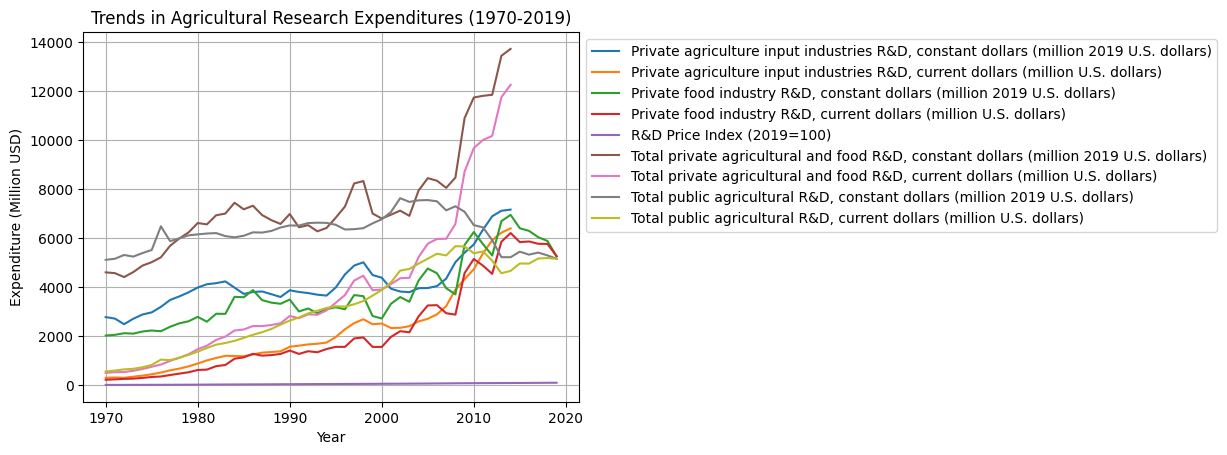

In [ ]:
# 1. Line Plot: Trends Over Time

df["Year"] = df["Year"].astype(int)
df["Value"] = df["Value"].astype(float)

for attribute in df["Attribute"].unique():
    subset = df[df["Attribute"] == attribute]
    plt.plot(subset["Year"].to_numpy(), subset["Value"].to_numpy(), label=attribute)

plt.xlabel("Year")
plt.ylabel("Expenditure (Million USD)")
plt.title("Trends in Agricultural Research Expenditures (1970-2019)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

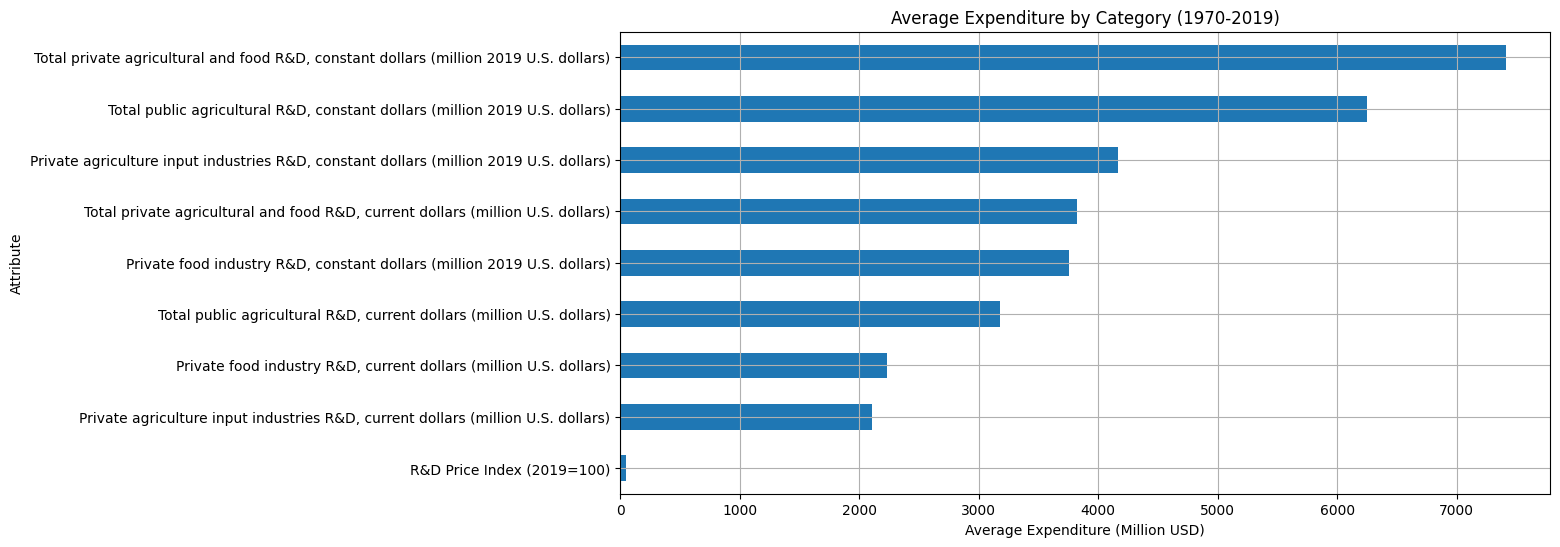

In [ ]:
# 2. Bar Chart: Average Expenditure by Category
avg_expenditure = df.groupby("Attribute")["Value"].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_expenditure.plot(kind="barh")
plt.xlabel("Average Expenditure (Million USD)")
plt.ylabel("Attribute")
plt.title("Average Expenditure by Category (1970-2019)")
plt.grid(True)
plt.show()

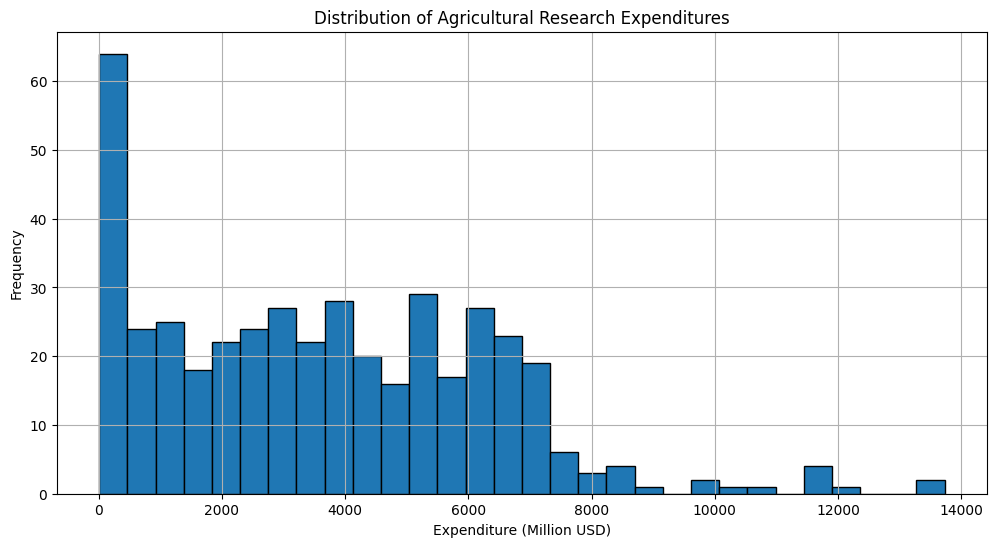

In [ ]:
# 3. Histogram: Distribution of Expenditures
plt.figure(figsize=(12, 6))
plt.hist(df["Value"], bins=30, edgecolor="black")
plt.xlabel("Expenditure (Million USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Agricultural Research Expenditures")
plt.grid(True)
plt.show()

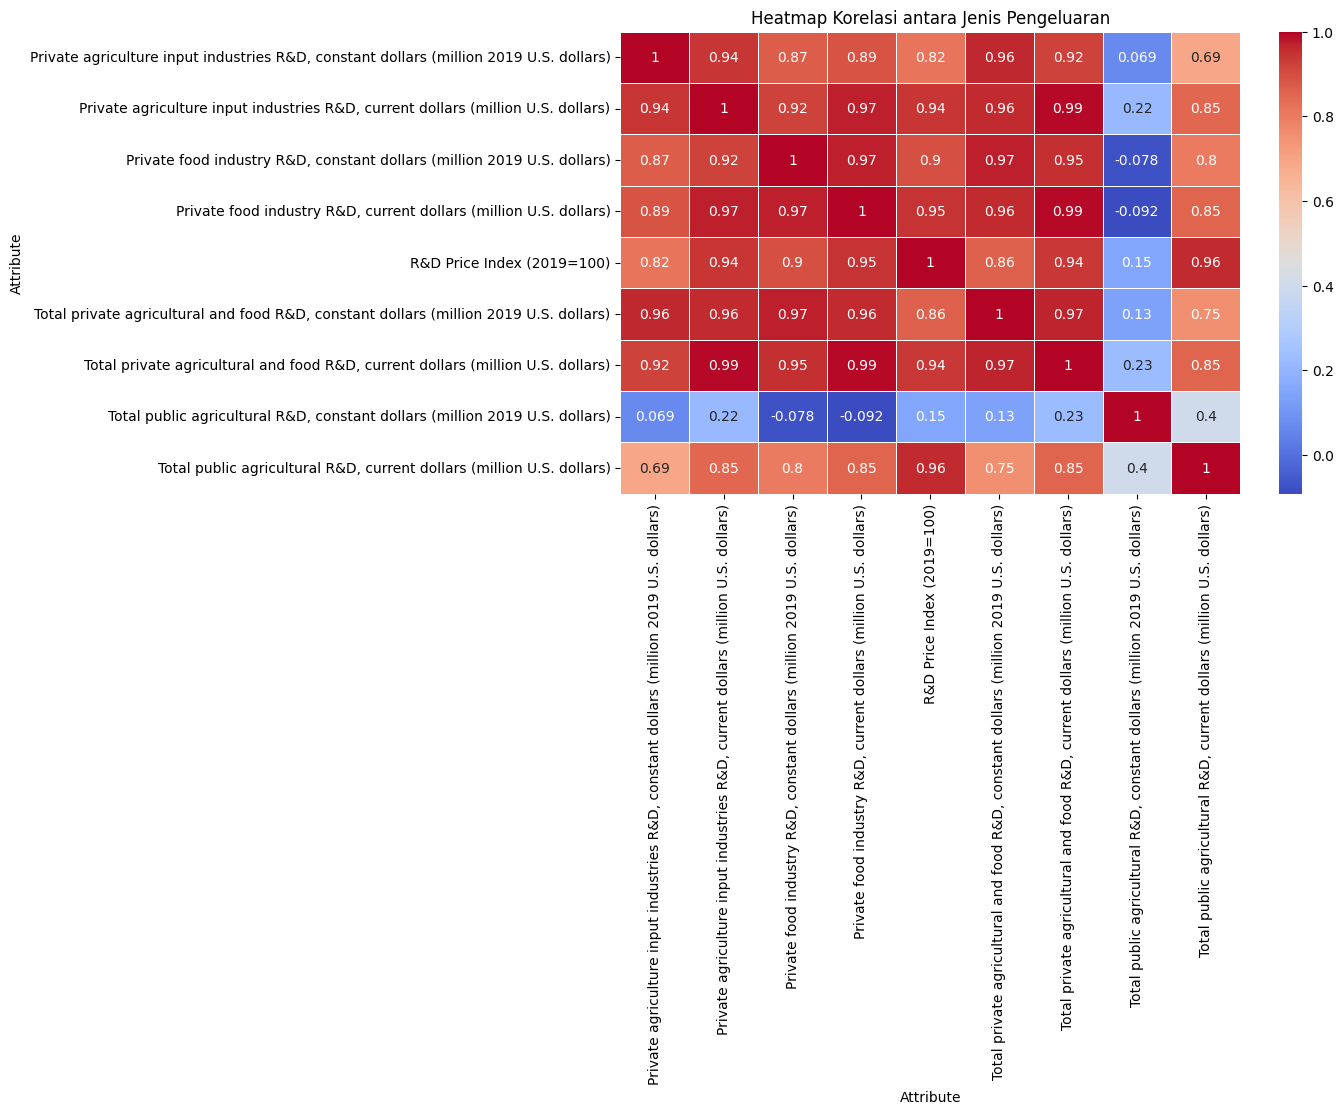

In [ ]:
# 2. Korelasi Antar Kategori (Heatmap)
pivot_df = df.pivot(index="Year", columns="Attribute", values="Value")
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi antara Jenis Pengeluaran")
plt.show()

In [ ]:
pivot_df = df.pivot(index="Year", columns="Attribute", values="Value")

In [ ]:
correlation_matrix = pivot_df.corr()

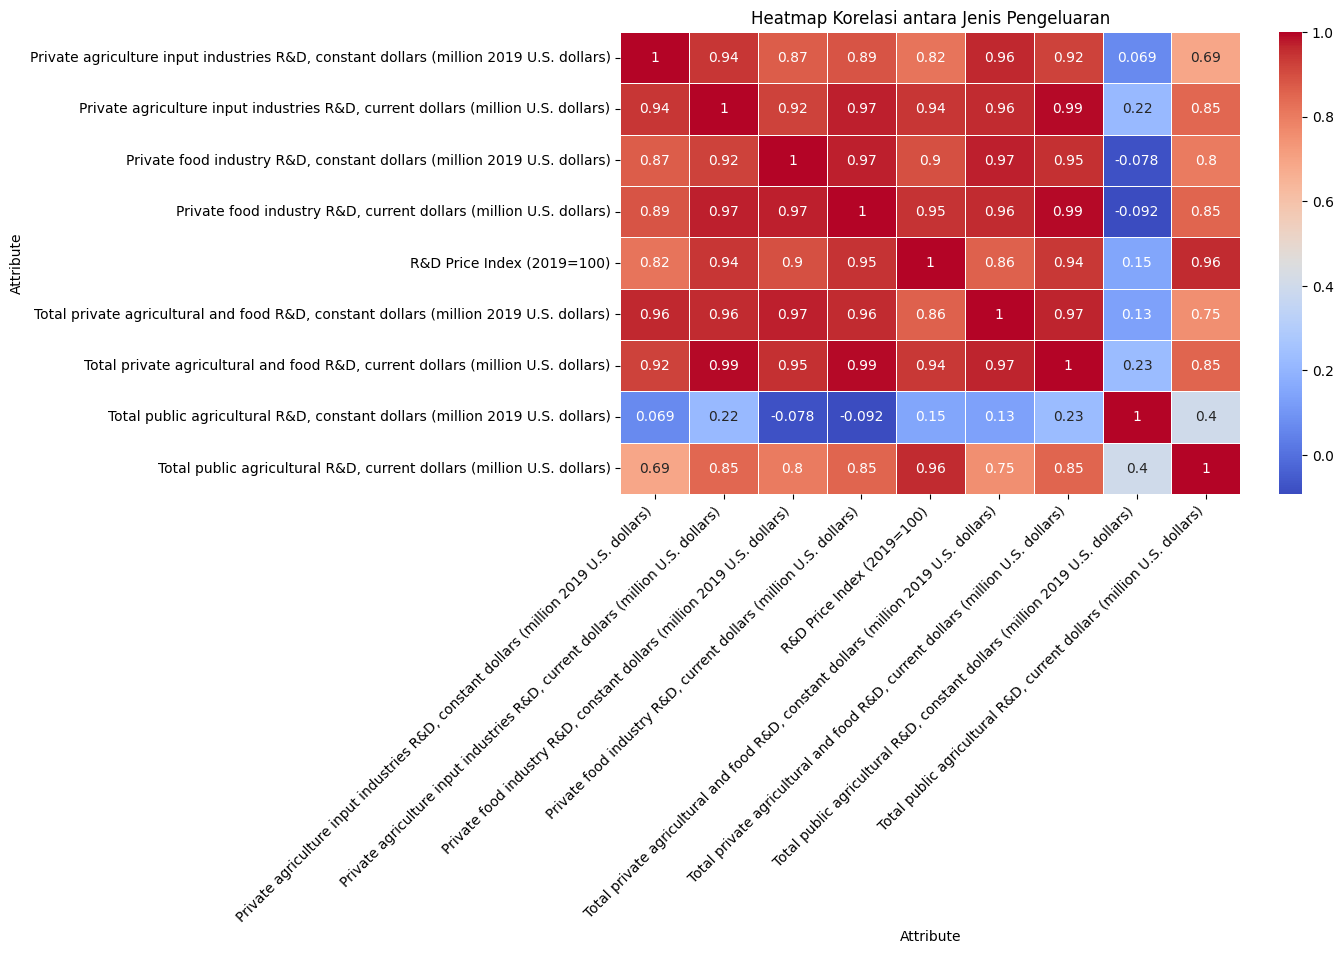

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi antara Jenis Pengeluaran")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate by 45 degrees and align to the right

plt.show()

 Question 1: Which attribute has the highest average expenditure over the years?

In [ ]:
avg_expenditure = df.groupby("Attribute")["Value"].mean().sort_values(ascending=False)
highest_avg_expenditure = avg_expenditure.index[0]

print(f"The attribute with the highest average expenditure is: {highest_avg_expenditure}")

The attribute with the highest average expenditure is: Total private agricultural and food R&D, constant dollars (million 2019 U.S. dollars)


Question 2: What is the overall trend of total agricultural research expenditures over time?


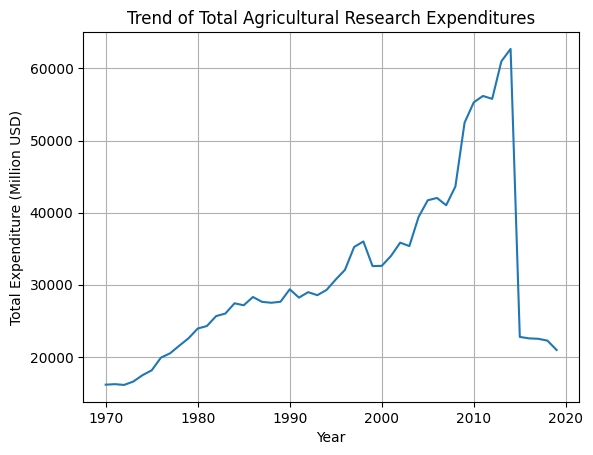

In [ ]:
total_expenditure_by_year = df.groupby("Year")["Value"].sum()

plt.plot(total_expenditure_by_year.index, total_expenditure_by_year.values)
plt.xlabel("Year")
plt.ylabel("Total Expenditure (Million USD)")
plt.title("Trend of Total Agricultural Research Expenditures")
plt.grid(True)
plt.show()

Question 3: Which attributes show the strongest positive correlation with each other?

In [ ]:
pivot_df = df.pivot(index="Year", columns="Attribute", values="Value")
correlation_matrix = pivot_df.corr()

# Get the top 5 strongest positive correlations (excluding self-correlation)
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_correlations = top_correlations[top_correlations < 1][:5]  # Exclude 1 (self-correlation)

print("Top 5 Strongest Positive Correlations:")
print(top_correlations)

Top 5 Strongest Positive Correlations:
Attribute                                                                              Attribute                                                                       
Private food industry R&D, current dollars (million U.S. dollars)                      Total private agricultural and food R&D, current dollars (million U.S. dollars)     0.993663
Total private agricultural and food R&D, current dollars (million U.S. dollars)        Private agriculture input industries R&D, current dollars (million U.S. dollars)    0.993285
Private food industry R&D, current dollars (million U.S. dollars)                      Private agriculture input industries R&D, current dollars (million U.S. dollars)    0.974231
Private food industry R&D, constant dollars (million 2019 U.S. dollars)                Private food industry R&D, current dollars (million U.S. dollars)                   0.974051
Total private agricultural and food R&D, constant dollars (million 2019 U

In [ ]:
from scipy import stats

attribute1 = "Animals"  # Replace with the attribute you want to compare
attribute2 = "Plants"    # Replace with the other attribute

data1 = df[df["Attribute"] == attribute1]["Value"]
data2 = df[df["Attribute"] == attribute2]["Value"]

t_statistic, p_value = stats.ttest_ind(data1, data2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in expenditure between the two attributes.")
else:
    print("There is no significant difference in expenditure between the two attributes.")

T-statistic: nan
P-value: nan
There is no significant difference in expenditure between the two attributes.


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Preprocess data (ensure 'Year' is an integer and 'Value' is a float)
df['Year'] = df['Year'].astype(int)
df['Value'] = df['Value'].astype(float)

# Group data by year and sum expenditures
total_expenditure_by_year = df.groupby('Year')['Value'].sum().reset_index()

# Create a time series object
time_series_data = total_expenditure_by_year.set_index('Year')['Value']

In [ ]:
# Split data into train and test sets
train_data = time_series_data[:-5]  # Use all but the last 5 years for training
test_data = time_series_data[-5:]   # Use the last 5 years for testing

# Fit the ARIMA model (you might need to experiment with p, d, q values)
# (p, d, q) are the model's order parameters
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 2120785348.3879578


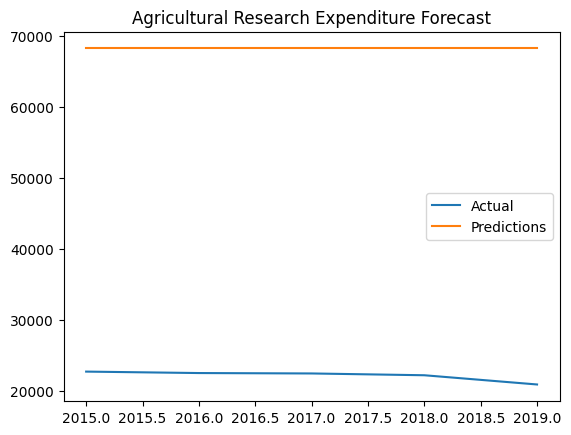

In [ ]:
# Make predictions on the test set
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the predictions against actual values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('Agricultural Research Expenditure Forecast')
plt.show()